In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# 載入資料
train_data = pd.read_csv("/Users/yulin/Desktop/data/train.csv")
test_data = pd.read_csv("/Users/yulin/Desktop/data/test.csv")

In [3]:
train_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [4]:
test_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [5]:
#將目標列的名稱設為 'smoking'，這是訓練數據中要預測的變量。
target_column = 'smoking'

#x為去掉smoking的資料（用來訓練預測），y為只有smoking的資料（用來評估）
x = train_data.drop(columns=[target_column])
y = train_data[target_column]

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x,y,random_state=1)

x_train,x_val,y_train,y_val=train_test_split(
    x_train,y_train,test_size=0.5,random_state=1)

In [7]:
x

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,300,40,75,16.5,1,1.0,22,25,27,0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,55,57,126,16.2,1,1.1,27,23,37,1
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,197,45,93,17.4,1,0.8,27,31,53,0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,203,38,102,15.9,1,1.0,20,27,30,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,87,44,93,15.4,1,0.8,19,13,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,47,72,159,14.5,1,0.8,25,26,13,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,202,64,108,14.5,1,0.6,21,20,18,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,45,87,93,10.9,1,0.6,15,9,12,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,148,55,80,14.4,1,1.1,22,17,37,0


In [8]:
#split data
x.shape,x_test.shape,x_train.shape,x_val.shape

((159256, 23), (39814, 23), (59721, 23), (59721, 23))

In [9]:
x_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
118031,118031,45,155,45,65.0,1.0,1.2,1,1,170,...,105,100,93,14.0,1,0.5,17,13,19,0
20900,20900,30,170,70,74.0,1.0,0.9,1,1,116,...,146,56,108,15.8,1,0.9,30,22,97,1
50382,50382,40,175,90,100.0,1.2,0.9,1,1,140,...,125,46,108,18.2,1,0.9,20,23,21,0
75642,75642,50,165,70,84.0,1.0,1.2,1,1,131,...,137,35,148,15.0,1,0.8,29,19,34,0
151809,151809,25,170,70,76.0,1.2,1.5,1,1,118,...,79,98,98,16.3,1,1.0,22,17,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52783,52783,60,165,70,90.0,0.8,1.0,1,1,120,...,169,40,95,16.7,1,0.9,28,28,47,0
48355,48355,25,165,75,89.0,0.9,0.9,1,1,119,...,108,54,106,16.2,2,1.0,16,22,36,0
75122,75122,40,155,55,75.0,0.9,0.5,1,1,136,...,29,86,93,10.3,1,1.0,25,19,23,0
128715,128715,55,160,60,82.0,0.8,0.6,1,1,116,...,128,59,157,13.5,1,0.8,23,15,34,0


In [10]:
y.shape,y_test.shape,y_train.shape,y_val.shape

((159256,), (39814,), (59721,), (59721,))

In [11]:
y

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

Preprocessing

In [12]:
#x標準化
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_val=scal.transform(x_val)
x_test=scal.transform(x_test)

#y本來就是0(沒抽煙）和1(有抽煙）所以不用標準化

In [13]:
x_test

array([[ 0.82934467,  0.05669179, -1.16665756, ..., -0.85580726,
        -0.54486831, -0.49528081],
       [-1.28114112, -1.20797825,  0.53661506, ..., -0.28793331,
         1.91446103,  2.01905661],
       [-0.64054911, -0.36486489,  1.1043726 , ..., -0.2248362 ,
        -0.48180858, -0.49528081],
       ...,
       [-0.10299243, -0.36486489, -1.16665756, ..., -0.47722463,
        -0.41874885, -0.49528081],
       [ 1.0614892 ,  0.89980515, -0.59890002, ..., -0.72961305,
        -0.07192036, -0.49528081],
       [ 0.14362311, -0.78642157,  1.67213014, ...,  0.46923197,
        -0.10345022, -0.49528081]])

Build Model

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [15]:
r_l2 = keras.regularizers.l2(l2=0.001)

model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(23,),kernel_initializer='he_normal', kernel_regularizer=r_l2))
model.add(keras.layers.LeakyReLU(alpha=0.01))
model.add(keras.layers.Dropout(rate=0.3))
model.add(Dense(units=64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=r_l2))
model.add(keras.layers.PReLU())
model.add(keras.layers.Dropout(rate=0.3))
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=r_l2))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 p_re_lu (PReLU)             (None, 64)                64        
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [17]:
opt=tf.keras.optimizers.legacy.SGD(learning_rate=1e-2,clipnorm=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
train=model.fit(x_train,y_train,
                epochs=50,
                validation_data=(x_val,y_val))

Epoch 1/50
1867/1867 [==============================] - 3s 1ms/step - loss: 0.9361 - accuracy: 0.7004 - val_loss: 0.8517 - val_accuracy: 0.7442
Epoch 2/50
1867/1867 [==============================] - 2s 991us/step - loss: 0.8603 - accuracy: 0.7306 - val_loss: 0.8160 - val_accuracy: 0.7509
Epoch 3/50
1867/1867 [==============================] - 2s 972us/step - loss: 0.8233 - accuracy: 0.7384 - val_loss: 0.7869 - val_accuracy: 0.7540
Epoch 4/50
1867/1867 [==============================] - 2s 1ms/step - loss: 0.7951 - accuracy: 0.7430 - val_loss: 0.7621 - val_accuracy: 0.7567
Epoch 5/50
1867/1867 [==============================] - 2s 1ms/step - loss: 0.7694 - accuracy: 0.7459 - val_loss: 0.7406 - val_accuracy: 0.7547
Epoch 6/50
1867/1867 [==============================] - 2s 995us/step - loss: 0.7471 - accuracy: 0.7466 - val_loss: 0.7203 - val_accuracy: 0.7562
Epoch 7/50
1867/1867 [==============================] - 2s 976us/step - loss: 0.7247 - accuracy: 0.7493 - val_loss: 0.7013 - val_a

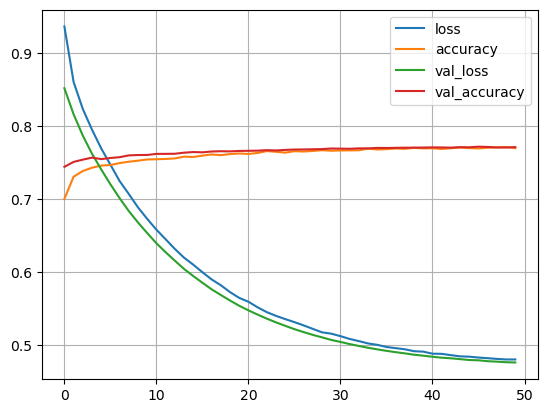

In [19]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [20]:
model.evaluate(x_test,y_test)

1245/1245 [==============================] - 1s 454us/step - loss: 0.4702 - accuracy: 0.7771


[0.47021958231925964, 0.777088463306427]

In [21]:
y_proba=model.predict(x_test)
y_proba[:3].round(2)

1245/1245 [==============================] - 1s 371us/step


array([[0.03],
       [0.87],
       [0.65]], dtype=float32)

In [38]:
threshold = 0.5
y_pred = (y_proba > threshold).astype(int)
print(y_pred[:3])

[[0]
 [1]
 [1]]


In [23]:
y_test[:3]

118031    0
20900     1
50382     1
Name: smoking, dtype: int64

0.7770884613452554


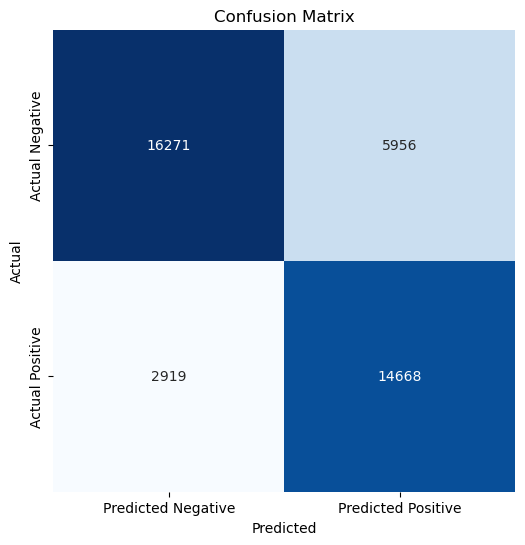

In [24]:
# Make predictions on the test data

# Evaluate the model
print(accuracy_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# 对测试数据进行标准化
x_test_scaled = scal.fit_transform(test_data)

# 进行预测
test_predictions = model.predict(x_test_scaled)

# 使用阈值得到最终的预测结果
threshold = 0.5
y_pred = (test_predictions > threshold).astype(int)

# 创建并保存提交文件
submission = pd.DataFrame({
    'id': test_data['id'], 
    'smoking': y_pred.flatten()})
submission.to_csv('submission.csv', index=False)


3318/3318 [==============================] - 1s 341us/step
